In [ ]:
import pandas as pd
import sqlite3
import sqlalchemy as sqly
df = pd.read_html('https://en.m.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population_density')[0]
cols = [0,1]
df = df[df.columns[cols]]
df.columns = [x[0] for x in df.columns]

**Data Viz**

In [ ]:
import matplotlib.pyplot as plt
import seaborn

In [ ]:
df.describe()
df = df.sort_values('Population',ascending=False)[2:32] # Top 30 Countries

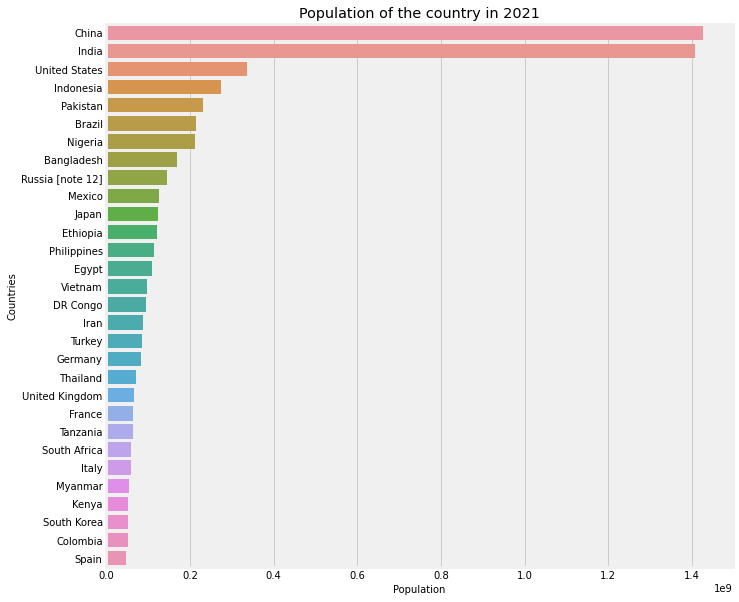

In [ ]:
plt.figure(figsize=(10,10))
ax = seaborn.barplot(x="Population", y="Country / Territory",data=df,linewidth = 1)
plt.title("Population of the country in 2021")
ax.set_xlabel(xlabel = 'Population', fontsize = 10)
ax.set_ylabel(ylabel = 'Countries', fontsize = 10)
plt.show()

**Database Connection**

In [ ]:
conn = sqlite3.connect('country.db')
cur = conn.cursor()
cur.execute('CREATE TABLE COUNTRY_LIST("Country / Territory" TEXT NOT NULL, Population INT NOT NULL)')
conn.commit()
engine = sqly.create_engine('sqlite:///country.db')

**Convert to Database**

In [ ]:
cur.execute('SELECT * FROM COUNTRY_LIST')
cur.fetchall()
pd.read_sql('COUNTRY_LIST',engine)
df.to_sql('COUNTRY_LIST',engine, if_exists='append',index=False)
cur.execute('SELECT * FROM COUNTRY_LIST')
cur.fetchall()
cur.execute('PRAGMA table_info(COUNTRY_LIST)')
desc = cur.fetchall()
names = [fields[1] for fields in desc]
print(names)  

In [ ]:
pd.read_sql('SELECT * FROM COUNTRY_LIST',engine)